In [1]:
import sys, os
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet")
import dense_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'dense_unet_50ep_1024_fG_wo_slice'
INPUT_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-02-14 19:38:38.735007: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 19:38:38.735032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 19:38:38.736069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 19:38:38.741390: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 19:38:39.312443: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,}

# Create augmentation
# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    is_test=False,
    slice_black=False,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

# Create model
model = dense_unet.build_model(input_shape=INPUT_SHAPE)
model.summary()

2024-02-14 18:40:55.994450: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-14 18:40:56.029630: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-14 18:40:56.029830: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1024, 1024, 1)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 1024, 1024, 48)       480       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 1024, 1024, 48)       192       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 1024, 1024, 48)       0         ['batch_normalization[0][0

In [4]:
train.model_train(model,
                  epoch = 50,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True)


Epoch 00001: WeightDecayScheduler setting learning rate to 9.999899747381279e-05.
Epoch 1/50


2024-02-06 17:20:56.333920: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-06 17:21:00.116584: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2c5168a750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-06 17:21:00.116602: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-02-06 17:21:00.123434: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707240060.196139  144865 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1080/1080 [==============================] - ETA: 0s - loss: 0.2835 - sensitivity: 0.7086 - specificity: 0.9733 - accuracy: 0.9557INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/1--0.2835-0.7086-0.9733-0.2508-0.7390-0.9767.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/1--0.2835-0.7086-0.9733-0.2508-0.7390-0.9767.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/1--0.2835-0.7086-0.9733-0.2508-0.7390-0.9767.pb
1080/1080 [==============================] - 323s 282ms/step - loss: 0.2835 - sensitivity: 0.7086 - specificity: 0.9733 - accuracy: 0.9557 - val_loss: 0.2508 - val_sensitivity: 0.7390 - val_specificity: 0.9767 - val_accuracy: 0.9618

Epoch 00002: WeightDecayScheduler setting learning rate to 9.99980006775877e-05.
Epoch 2/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2231 - sensitivity: 0.7550 - specificity: 0.9818 - accuracy: 0.9670INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/2--0.2231-0.7550-0.9818-0.2405-0.7059-0.9836.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/2--0.2231-0.7550-0.9818-0.2405-0.7059-0.9836.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/2--0.2231-0.7550-0.9818-0.2405-0.7059-0.9836.pb
1080/1080 [==============================] - 300s 277ms/step - loss: 0.2231 - sensitivity: 0.7550 - specificity: 0.9818 - accuracy: 0.9670 - val_loss: 0.2405 - val_sensitivity: 0.7059 - val_specificity: 0.9836 - val_accuracy: 0.9658

Epoch 00003: WeightDecayScheduler setting learning rate to 9.999700388136262e-05.
Epoch 3/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2107 - sensitivity: 0.7639 - specificity: 0.9832 - accuracy: 0.9690INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/3--0.2107-0.7639-0.9832-0.2339-0.7200-0.9829.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/3--0.2107-0.7639-0.9832-0.2339-0.7200-0.9829.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/3--0.2107-0.7639-0.9832-0.2339-0.7200-0.9829.pb
1080/1080 [==============================] - 302s 280ms/step - loss: 0.2107 - sensitivity: 0.7639 - specificity: 0.9832 - accuracy: 0.9690 - val_loss: 0.2339 - val_sensitivity: 0.7200 - val_specificity: 0.9829 - val_accuracy: 0.9662

Epoch 00004: WeightDecayScheduler setting learning rate to 9.999600708513754e-05.
Epoch 4/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2019 - sensitivity: 0.7689 - specificity: 0.9841 - accuracy: 0.9703INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/4--0.2019-0.7689-0.9841-0.2647-0.6232-0.9884.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/4--0.2019-0.7689-0.9841-0.2647-0.6232-0.9884.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/4--0.2019-0.7689-0.9841-0.2647-0.6232-0.9884.pb
1080/1080 [==============================] - 302s 280ms/step - loss: 0.2019 - sensitivity: 0.7689 - specificity: 0.9841 - accuracy: 0.9703 - val_loss: 0.2647 - val_sensitivity: 0.6232 - val_specificity: 0.9884 - val_accuracy: 0.9645

Epoch 00005: WeightDecayScheduler setting learning rate to 9.999501028891246e-05.
Epoch 5/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1960 - sensitivity: 0.7725 - specificity: 0.9845 - accuracy: 0.9709INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/5--0.1960-0.7725-0.9845-0.2272-0.7451-0.9811.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/5--0.1960-0.7725-0.9845-0.2272-0.7451-0.9811.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/5--0.1960-0.7725-0.9845-0.2272-0.7451-0.9811.pb
1080/1080 [==============================] - 302s 279ms/step - loss: 0.1960 - sensitivity: 0.7725 - specificity: 0.9845 - accuracy: 0.9709 - val_loss: 0.2272 - val_sensitivity: 0.7451 - val_specificity: 0.9811 - val_accuracy: 0.9664

Epoch 00006: WeightDecayScheduler setting learning rate to 9.999401349268737e-05.
Epoch 6/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1911 - sensitivity: 0.7764 - specificity: 0.9848 - accuracy: 0.9715INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/6--0.1911-0.7764-0.9848-0.2282-0.7314-0.9823.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/6--0.1911-0.7764-0.9848-0.2282-0.7314-0.9823.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/6--0.1911-0.7764-0.9848-0.2282-0.7314-0.9823.pb
1080/1080 [==============================] - 313s 290ms/step - loss: 0.1911 - sensitivity: 0.7764 - specificity: 0.9848 - accuracy: 0.9715 - val_loss: 0.2282 - val_sensitivity: 0.7314 - val_specificity: 0.9823 - val_accuracy: 0.9665

Epoch 00007: WeightDecayScheduler setting learning rate to 9.999301669646229e-05.
Epoch 7/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1877 - sensitivity: 0.7792 - specificity: 0.9850 - accuracy: 0.9719INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/7--0.1877-0.7792-0.9850-0.2285-0.7112-0.9847.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/7--0.1877-0.7792-0.9850-0.2285-0.7112-0.9847.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/7--0.1877-0.7792-0.9850-0.2285-0.7112-0.9847.pb
1080/1080 [==============================] - 302s 280ms/step - loss: 0.1877 - sensitivity: 0.7792 - specificity: 0.9850 - accuracy: 0.9719 - val_loss: 0.2285 - val_sensitivity: 0.7112 - val_specificity: 0.9847 - val_accuracy: 0.9672

Epoch 00008: WeightDecayScheduler setting learning rate to 9.999201990023722e-05.
Epoch 8/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1851 - sensitivity: 0.7807 - specificity: 0.9853 - accuracy: 0.9722INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/8--0.1851-0.7807-0.9853-0.2226-0.7479-0.9819.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/8--0.1851-0.7807-0.9853-0.2226-0.7479-0.9819.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/8--0.1851-0.7807-0.9853-0.2226-0.7479-0.9819.pb
1080/1080 [==============================] - 300s 277ms/step - loss: 0.1851 - sensitivity: 0.7807 - specificity: 0.9853 - accuracy: 0.9722 - val_loss: 0.2226 - val_sensitivity: 0.7479 - val_specificity: 0.9819 - val_accuracy: 0.9672

Epoch 00009: WeightDecayScheduler setting learning rate to 9.999102310401214e-05.
Epoch 9/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1823 - sensitivity: 0.7834 - specificity: 0.9854 - accuracy: 0.9726INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/9--0.1823-0.7834-0.9854-0.2266-0.7214-0.9840.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/9--0.1823-0.7834-0.9854-0.2266-0.7214-0.9840.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/9--0.1823-0.7834-0.9854-0.2266-0.7214-0.9840.pb
1080/1080 [==============================] - 300s 278ms/step - loss: 0.1823 - sensitivity: 0.7834 - specificity: 0.9854 - accuracy: 0.9726 - val_loss: 0.2266 - val_sensitivity: 0.7214 - val_specificity: 0.9840 - val_accuracy: 0.9673

Epoch 00010: WeightDecayScheduler setting learning rate to 9.999002630778705e-05.
Epoch 10/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1800 - sensitivity: 0.7853 - specificity: 0.9855 - accuracy: 0.9728INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/10--0.1800-0.7853-0.9855-0.2235-0.7297-0.9834.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/10--0.1800-0.7853-0.9855-0.2235-0.7297-0.9834.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/10--0.1800-0.7853-0.9855-0.2235-0.7297-0.9834.pb
1080/1080 [==============================] - 303s 280ms/step - loss: 0.1800 - sensitivity: 0.7853 - specificity: 0.9855 - accuracy: 0.9728 - val_loss: 0.2235 - val_sensitivity: 0.7297 - val_specificity: 0.9834 - val_accuracy: 0.9674

Epoch 00011: WeightDecayScheduler setting learning rate to 9.998902951156197e-05.
Epoch 11/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1787 - sensitivity: 0.7868 - specificity: 0.9856 - accuracy: 0.9730INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/11--0.1787-0.7868-0.9856-0.2342-0.6798-0.9868.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/11--0.1787-0.7868-0.9856-0.2342-0.6798-0.9868.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/11--0.1787-0.7868-0.9856-0.2342-0.6798-0.9868.pb
1080/1080 [==============================] - 308s 285ms/step - loss: 0.1787 - sensitivity: 0.7868 - specificity: 0.9856 - accuracy: 0.9730 - val_loss: 0.2342 - val_sensitivity: 0.6798 - val_specificity: 0.9868 - val_accuracy: 0.9670

Epoch 00012: WeightDecayScheduler setting learning rate to 9.998803271533689e-05.
Epoch 12/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1772 - sensitivity: 0.7881 - specificity: 0.9857 - accuracy: 0.9732INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/12--0.1772-0.7881-0.9857-0.2242-0.7208-0.9843.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/12--0.1772-0.7881-0.9857-0.2242-0.7208-0.9843.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/12--0.1772-0.7881-0.9857-0.2242-0.7208-0.9843.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1772 - sensitivity: 0.7881 - specificity: 0.9857 - accuracy: 0.9732 - val_loss: 0.2242 - val_sensitivity: 0.7208 - val_specificity: 0.9843 - val_accuracy: 0.9675

Epoch 00013: WeightDecayScheduler setting learning rate to 9.99870359191118e-05.
Epoch 13/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1761 - sensitivity: 0.7893 - specificity: 0.9857 - accuracy: 0.9733INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/13--0.1761-0.7893-0.9857-0.2234-0.7104-0.9858.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/13--0.1761-0.7893-0.9857-0.2234-0.7104-0.9858.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/13--0.1761-0.7893-0.9857-0.2234-0.7104-0.9858.pb
1080/1080 [==============================] - 304s 281ms/step - loss: 0.1761 - sensitivity: 0.7893 - specificity: 0.9857 - accuracy: 0.9733 - val_loss: 0.2234 - val_sensitivity: 0.7104 - val_specificity: 0.9858 - val_accuracy: 0.9682

Epoch 00014: WeightDecayScheduler setting learning rate to 9.998603912288672e-05.
Epoch 14/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1743 - sensitivity: 0.7911 - specificity: 0.9858 - accuracy: 0.9735INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/14--0.1743-0.7911-0.9858-0.2236-0.7117-0.9855.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/14--0.1743-0.7911-0.9858-0.2236-0.7117-0.9855.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/14--0.1743-0.7911-0.9858-0.2236-0.7117-0.9855.pb
1080/1080 [==============================] - 307s 284ms/step - loss: 0.1743 - sensitivity: 0.7911 - specificity: 0.9858 - accuracy: 0.9735 - val_loss: 0.2236 - val_sensitivity: 0.7117 - val_specificity: 0.9855 - val_accuracy: 0.9679

Epoch 00015: WeightDecayScheduler setting learning rate to 9.998504232666165e-05.
Epoch 15/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1737 - sensitivity: 0.7919 - specificity: 0.9859 - accuracy: 0.9736INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/15--0.1737-0.7919-0.9859-0.2281-0.6926-0.9868.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/15--0.1737-0.7919-0.9859-0.2281-0.6926-0.9868.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/15--0.1737-0.7919-0.9859-0.2281-0.6926-0.9868.pb
1080/1080 [==============================] - 300s 278ms/step - loss: 0.1737 - sensitivity: 0.7919 - specificity: 0.9859 - accuracy: 0.9736 - val_loss: 0.2281 - val_sensitivity: 0.6926 - val_specificity: 0.9868 - val_accuracy: 0.9678

Epoch 00016: WeightDecayScheduler setting learning rate to 9.998404553043657e-05.
Epoch 16/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1725 - sensitivity: 0.7930 - specificity: 0.9860 - accuracy: 0.9738INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/16--0.1725-0.7930-0.9860-0.2214-0.7250-0.9844.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/16--0.1725-0.7930-0.9860-0.2214-0.7250-0.9844.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/16--0.1725-0.7930-0.9860-0.2214-0.7250-0.9844.pb
1080/1080 [==============================] - 308s 286ms/step - loss: 0.1725 - sensitivity: 0.7930 - specificity: 0.9860 - accuracy: 0.9738 - val_loss: 0.2214 - val_sensitivity: 0.7250 - val_specificity: 0.9844 - val_accuracy: 0.9678

Epoch 00017: WeightDecayScheduler setting learning rate to 9.998304873421149e-05.
Epoch 17/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1714 - sensitivity: 0.7947 - specificity: 0.9860 - accuracy: 0.9739INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/17--0.1714-0.7947-0.9860-0.2445-0.6554-0.9881.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/17--0.1714-0.7947-0.9860-0.2445-0.6554-0.9881.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/17--0.1714-0.7947-0.9860-0.2445-0.6554-0.9881.pb
1080/1080 [==============================] - 301s 279ms/step - loss: 0.1714 - sensitivity: 0.7947 - specificity: 0.9860 - accuracy: 0.9739 - val_loss: 0.2445 - val_sensitivity: 0.6554 - val_specificity: 0.9881 - val_accuracy: 0.9665

Epoch 00018: WeightDecayScheduler setting learning rate to 9.99820519379864e-05.
Epoch 18/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1703 - sensitivity: 0.7959 - specificity: 0.9860 - accuracy: 0.9741INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/18--0.1703-0.7959-0.9860-0.2265-0.7088-0.9854.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/18--0.1703-0.7959-0.9860-0.2265-0.7088-0.9854.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/18--0.1703-0.7959-0.9860-0.2265-0.7088-0.9854.pb
1080/1080 [==============================] - 311s 288ms/step - loss: 0.1703 - sensitivity: 0.7959 - specificity: 0.9860 - accuracy: 0.9741 - val_loss: 0.2265 - val_sensitivity: 0.7088 - val_specificity: 0.9854 - val_accuracy: 0.9675

Epoch 00019: WeightDecayScheduler setting learning rate to 9.998105514176132e-05.
Epoch 19/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1699 - sensitivity: 0.7965 - specificity: 0.9860 - accuracy: 0.9740INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/19--0.1699-0.7965-0.9860-0.2232-0.7103-0.9857.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/19--0.1699-0.7965-0.9860-0.2232-0.7103-0.9857.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/19--0.1699-0.7965-0.9860-0.2232-0.7103-0.9857.pb
1080/1080 [==============================] - 300s 278ms/step - loss: 0.1699 - sensitivity: 0.7965 - specificity: 0.9860 - accuracy: 0.9740 - val_loss: 0.2232 - val_sensitivity: 0.7103 - val_specificity: 0.9857 - val_accuracy: 0.9681

Epoch 00020: WeightDecayScheduler setting learning rate to 9.998005834553624e-05.
Epoch 20/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1690 - sensitivity: 0.7975 - specificity: 0.9861 - accuracy: 0.9742INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/20--0.1690-0.7975-0.9861-0.2189-0.7270-0.9846.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/20--0.1690-0.7975-0.9861-0.2189-0.7270-0.9846.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/20--0.1690-0.7975-0.9861-0.2189-0.7270-0.9846.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1690 - sensitivity: 0.7975 - specificity: 0.9861 - accuracy: 0.9742 - val_loss: 0.2189 - val_sensitivity: 0.7270 - val_specificity: 0.9846 - val_accuracy: 0.9682

Epoch 00021: WeightDecayScheduler setting learning rate to 9.997906154931117e-05.
Epoch 21/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1689 - sensitivity: 0.7980 - specificity: 0.9860 - accuracy: 0.9742INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/21--0.1689-0.7980-0.9860-0.2283-0.6946-0.9867.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/21--0.1689-0.7980-0.9860-0.2283-0.6946-0.9867.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/21--0.1689-0.7980-0.9860-0.2283-0.6946-0.9867.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1689 - sensitivity: 0.7980 - specificity: 0.9860 - accuracy: 0.9742 - val_loss: 0.2283 - val_sensitivity: 0.6946 - val_specificity: 0.9867 - val_accuracy: 0.9679

Epoch 00022: WeightDecayScheduler setting learning rate to 9.997806475308608e-05.
Epoch 22/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1673 - sensitivity: 0.7995 - specificity: 0.9862 - accuracy: 0.9744INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/22--0.1673-0.7995-0.9862-0.2206-0.7272-0.9848.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/22--0.1673-0.7995-0.9862-0.2206-0.7272-0.9848.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/22--0.1673-0.7995-0.9862-0.2206-0.7272-0.9848.pb
1080/1080 [==============================] - 302s 280ms/step - loss: 0.1673 - sensitivity: 0.7995 - specificity: 0.9862 - accuracy: 0.9744 - val_loss: 0.2206 - val_sensitivity: 0.7272 - val_specificity: 0.9848 - val_accuracy: 0.9684

Epoch 00023: WeightDecayScheduler setting learning rate to 9.9977067956861e-05.
Epoch 23/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1667 - sensitivity: 0.8003 - specificity: 0.9862 - accuracy: 0.9745INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/23--0.1667-0.8003-0.9862-0.2196-0.7375-0.9836.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/23--0.1667-0.8003-0.9862-0.2196-0.7375-0.9836.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/23--0.1667-0.8003-0.9862-0.2196-0.7375-0.9836.pb
1080/1080 [==============================] - 300s 278ms/step - loss: 0.1667 - sensitivity: 0.8003 - specificity: 0.9862 - accuracy: 0.9745 - val_loss: 0.2196 - val_sensitivity: 0.7375 - val_specificity: 0.9836 - val_accuracy: 0.9680

Epoch 00024: WeightDecayScheduler setting learning rate to 9.997607116063592e-05.
Epoch 24/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1665 - sensitivity: 0.8007 - specificity: 0.9862 - accuracy: 0.9745INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/24--0.1665-0.8007-0.9862-0.2186-0.7316-0.9843.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/24--0.1665-0.8007-0.9862-0.2186-0.7316-0.9843.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/24--0.1665-0.8007-0.9862-0.2186-0.7316-0.9843.pb
1080/1080 [==============================] - 298s 276ms/step - loss: 0.1665 - sensitivity: 0.8007 - specificity: 0.9862 - accuracy: 0.9745 - val_loss: 0.2186 - val_sensitivity: 0.7316 - val_specificity: 0.9843 - val_accuracy: 0.9682

Epoch 00025: WeightDecayScheduler setting learning rate to 9.997507436441083e-05.
Epoch 25/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1660 - sensitivity: 0.8016 - specificity: 0.9862 - accuracy: 0.9746INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/25--0.1660-0.8016-0.9862-0.2250-0.7049-0.9862.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/25--0.1660-0.8016-0.9862-0.2250-0.7049-0.9862.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/25--0.1660-0.8016-0.9862-0.2250-0.7049-0.9862.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1660 - sensitivity: 0.8016 - specificity: 0.9862 - accuracy: 0.9746 - val_loss: 0.2250 - val_sensitivity: 0.7049 - val_specificity: 0.9862 - val_accuracy: 0.9681

Epoch 00026: WeightDecayScheduler setting learning rate to 9.997407756818575e-05.
Epoch 26/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1651 - sensitivity: 0.8020 - specificity: 0.9863 - accuracy: 0.9747INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/26--0.1651-0.8020-0.9863-0.2155-0.7476-0.9832.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/26--0.1651-0.8020-0.9863-0.2155-0.7476-0.9832.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/26--0.1651-0.8020-0.9863-0.2155-0.7476-0.9832.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1651 - sensitivity: 0.8020 - specificity: 0.9863 - accuracy: 0.9747 - val_loss: 0.2155 - val_sensitivity: 0.7476 - val_specificity: 0.9832 - val_accuracy: 0.9683

Epoch 00027: WeightDecayScheduler setting learning rate to 9.997308077196067e-05.
Epoch 27/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1647 - sensitivity: 0.8028 - specificity: 0.9863 - accuracy: 0.9748INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/27--0.1647-0.8028-0.9863-0.2179-0.7410-0.9835.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/27--0.1647-0.8028-0.9863-0.2179-0.7410-0.9835.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/27--0.1647-0.8028-0.9863-0.2179-0.7410-0.9835.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1647 - sensitivity: 0.8028 - specificity: 0.9863 - accuracy: 0.9748 - val_loss: 0.2179 - val_sensitivity: 0.7410 - val_specificity: 0.9835 - val_accuracy: 0.9681

Epoch 00028: WeightDecayScheduler setting learning rate to 9.99720839757356e-05.
Epoch 28/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1638 - sensitivity: 0.8037 - specificity: 0.9863 - accuracy: 0.9749INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/28--0.1638-0.8037-0.9863-0.2301-0.6848-0.9874.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/28--0.1638-0.8037-0.9863-0.2301-0.6848-0.9874.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/28--0.1638-0.8037-0.9863-0.2301-0.6848-0.9874.pb
1080/1080 [==============================] - 297s 275ms/step - loss: 0.1638 - sensitivity: 0.8037 - specificity: 0.9863 - accuracy: 0.9749 - val_loss: 0.2301 - val_sensitivity: 0.6848 - val_specificity: 0.9874 - val_accuracy: 0.9678

Epoch 00029: WeightDecayScheduler setting learning rate to 9.997108717951051e-05.
Epoch 29/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1643 - sensitivity: 0.8032 - specificity: 0.9864 - accuracy: 0.9748INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/29--0.1643-0.8032-0.9864-0.2220-0.7130-0.9859.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/29--0.1643-0.8032-0.9864-0.2220-0.7130-0.9859.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/29--0.1643-0.8032-0.9864-0.2220-0.7130-0.9859.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1643 - sensitivity: 0.8032 - specificity: 0.9864 - accuracy: 0.9748 - val_loss: 0.2220 - val_sensitivity: 0.7130 - val_specificity: 0.9859 - val_accuracy: 0.9684

Epoch 00030: WeightDecayScheduler setting learning rate to 9.997009038328543e-05.
Epoch 30/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1629 - sensitivity: 0.8050 - specificity: 0.9864 - accuracy: 0.9750INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/30--0.1629-0.8050-0.9864-0.2207-0.7186-0.9855.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/30--0.1629-0.8050-0.9864-0.2207-0.7186-0.9855.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/30--0.1629-0.8050-0.9864-0.2207-0.7186-0.9855.pb
1080/1080 [==============================] - 303s 281ms/step - loss: 0.1629 - sensitivity: 0.8050 - specificity: 0.9864 - accuracy: 0.9750 - val_loss: 0.2207 - val_sensitivity: 0.7186 - val_specificity: 0.9855 - val_accuracy: 0.9685

Epoch 00031: WeightDecayScheduler setting learning rate to 9.996909358706035e-05.
Epoch 31/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1622 - sensitivity: 0.8053 - specificity: 0.9865 - accuracy: 0.9751INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/31--0.1622-0.8053-0.9865-0.2337-0.6830-0.9874.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/31--0.1622-0.8053-0.9865-0.2337-0.6830-0.9874.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/31--0.1622-0.8053-0.9865-0.2337-0.6830-0.9874.pb
1080/1080 [==============================] - 300s 278ms/step - loss: 0.1622 - sensitivity: 0.8053 - specificity: 0.9865 - accuracy: 0.9751 - val_loss: 0.2337 - val_sensitivity: 0.6830 - val_specificity: 0.9874 - val_accuracy: 0.9676

Epoch 00032: WeightDecayScheduler setting learning rate to 9.996809679083526e-05.
Epoch 32/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1620 - sensitivity: 0.8058 - specificity: 0.9865 - accuracy: 0.9751INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/32--0.1620-0.8058-0.9865-0.2344-0.6711-0.9878.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/32--0.1620-0.8058-0.9865-0.2344-0.6711-0.9878.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/32--0.1620-0.8058-0.9865-0.2344-0.6711-0.9878.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1620 - sensitivity: 0.8058 - specificity: 0.9865 - accuracy: 0.9751 - val_loss: 0.2344 - val_sensitivity: 0.6711 - val_specificity: 0.9878 - val_accuracy: 0.9672

Epoch 00033: WeightDecayScheduler setting learning rate to 9.996709999461018e-05.
Epoch 33/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1611 - sensitivity: 0.8071 - specificity: 0.9865 - accuracy: 0.9752INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/33--0.1611-0.8071-0.9865-0.2238-0.7117-0.9857.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/33--0.1611-0.8071-0.9865-0.2238-0.7117-0.9857.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/33--0.1611-0.8071-0.9865-0.2238-0.7117-0.9857.pb
1080/1080 [==============================] - 299s 276ms/step - loss: 0.1611 - sensitivity: 0.8071 - specificity: 0.9865 - accuracy: 0.9752 - val_loss: 0.2238 - val_sensitivity: 0.7117 - val_specificity: 0.9857 - val_accuracy: 0.9680

Epoch 00034: WeightDecayScheduler setting learning rate to 9.99661031983851e-05.
Epoch 34/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1610 - sensitivity: 0.8067 - specificity: 0.9866 - accuracy: 0.9753INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/34--0.1610-0.8067-0.9866-0.2240-0.7055-0.9861.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/34--0.1610-0.8067-0.9866-0.2240-0.7055-0.9861.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/34--0.1610-0.8067-0.9866-0.2240-0.7055-0.9861.pb
1080/1080 [==============================] - 298s 276ms/step - loss: 0.1610 - sensitivity: 0.8067 - specificity: 0.9866 - accuracy: 0.9753 - val_loss: 0.2240 - val_sensitivity: 0.7055 - val_specificity: 0.9861 - val_accuracy: 0.9680

Epoch 00035: WeightDecayScheduler setting learning rate to 9.996510640216003e-05.
Epoch 35/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1603 - sensitivity: 0.8080 - specificity: 0.9866 - accuracy: 0.9753INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/35--0.1603-0.8080-0.9866-0.2198-0.7218-0.9851.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/35--0.1603-0.8080-0.9866-0.2198-0.7218-0.9851.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/35--0.1603-0.8080-0.9866-0.2198-0.7218-0.9851.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1603 - sensitivity: 0.8080 - specificity: 0.9866 - accuracy: 0.9753 - val_loss: 0.2198 - val_sensitivity: 0.7218 - val_specificity: 0.9851 - val_accuracy: 0.9682

Epoch 00036: WeightDecayScheduler setting learning rate to 9.996410960593494e-05.
Epoch 36/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1603 - sensitivity: 0.8075 - specificity: 0.9867 - accuracy: 0.9754INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/36--0.1603-0.8075-0.9867-0.2189-0.7157-0.9861.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/36--0.1603-0.8075-0.9867-0.2189-0.7157-0.9861.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/36--0.1603-0.8075-0.9867-0.2189-0.7157-0.9861.pb
1080/1080 [==============================] - 302s 279ms/step - loss: 0.1603 - sensitivity: 0.8075 - specificity: 0.9867 - accuracy: 0.9754 - val_loss: 0.2189 - val_sensitivity: 0.7157 - val_specificity: 0.9861 - val_accuracy: 0.9687

Epoch 00037: WeightDecayScheduler setting learning rate to 9.996311280970986e-05.
Epoch 37/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1596 - sensitivity: 0.8088 - specificity: 0.9866 - accuracy: 0.9754INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/37--0.1596-0.8088-0.9866-0.2223-0.7181-0.9854.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/37--0.1596-0.8088-0.9866-0.2223-0.7181-0.9854.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/37--0.1596-0.8088-0.9866-0.2223-0.7181-0.9854.pb
1080/1080 [==============================] - 298s 276ms/step - loss: 0.1596 - sensitivity: 0.8088 - specificity: 0.9866 - accuracy: 0.9754 - val_loss: 0.2223 - val_sensitivity: 0.7181 - val_specificity: 0.9854 - val_accuracy: 0.9683

Epoch 00038: WeightDecayScheduler setting learning rate to 9.996211601348478e-05.
Epoch 38/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1592 - sensitivity: 0.8097 - specificity: 0.9866 - accuracy: 0.9755INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/38--0.1592-0.8097-0.9866-0.2169-0.7267-0.9852.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/38--0.1592-0.8097-0.9866-0.2169-0.7267-0.9852.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/38--0.1592-0.8097-0.9866-0.2169-0.7267-0.9852.pb
1080/1080 [==============================] - 299s 277ms/step - loss: 0.1592 - sensitivity: 0.8097 - specificity: 0.9866 - accuracy: 0.9755 - val_loss: 0.2169 - val_sensitivity: 0.7267 - val_specificity: 0.9852 - val_accuracy: 0.9686

Epoch 00039: WeightDecayScheduler setting learning rate to 9.99611192172597e-05.
Epoch 39/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1587 - sensitivity: 0.8098 - specificity: 0.9867 - accuracy: 0.9756INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/39--0.1587-0.8098-0.9867-0.2287-0.6884-0.9872.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/39--0.1587-0.8098-0.9867-0.2287-0.6884-0.9872.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/39--0.1587-0.8098-0.9867-0.2287-0.6884-0.9872.pb
1080/1080 [==============================] - 313s 289ms/step - loss: 0.1587 - sensitivity: 0.8098 - specificity: 0.9867 - accuracy: 0.9756 - val_loss: 0.2287 - val_sensitivity: 0.6884 - val_specificity: 0.9872 - val_accuracy: 0.9679

Epoch 00040: WeightDecayScheduler setting learning rate to 9.996012242103461e-05.
Epoch 40/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1586 - sensitivity: 0.8102 - specificity: 0.9867 - accuracy: 0.9756INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/40--0.1586-0.8102-0.9867-0.2157-0.7390-0.9843.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/40--0.1586-0.8102-0.9867-0.2157-0.7390-0.9843.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/40--0.1586-0.8102-0.9867-0.2157-0.7390-0.9843.pb
1080/1080 [==============================] - 307s 284ms/step - loss: 0.1586 - sensitivity: 0.8102 - specificity: 0.9867 - accuracy: 0.9756 - val_loss: 0.2157 - val_sensitivity: 0.7390 - val_specificity: 0.9843 - val_accuracy: 0.9688

Epoch 00041: WeightDecayScheduler setting learning rate to 9.995912562480953e-05.
Epoch 41/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1581 - sensitivity: 0.8108 - specificity: 0.9867 - accuracy: 0.9757INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/41--0.1581-0.8108-0.9867-0.2228-0.7072-0.9862.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/41--0.1581-0.8108-0.9867-0.2228-0.7072-0.9862.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/41--0.1581-0.8108-0.9867-0.2228-0.7072-0.9862.pb
1080/1080 [==============================] - 297s 275ms/step - loss: 0.1581 - sensitivity: 0.8108 - specificity: 0.9867 - accuracy: 0.9757 - val_loss: 0.2228 - val_sensitivity: 0.7072 - val_specificity: 0.9862 - val_accuracy: 0.9682

Epoch 00042: WeightDecayScheduler setting learning rate to 9.995812882858446e-05.
Epoch 42/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1576 - sensitivity: 0.8104 - specificity: 0.9869 - accuracy: 0.9758INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/42--0.1576-0.8104-0.9869-0.2410-0.6612-0.9882.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/42--0.1576-0.8104-0.9869-0.2410-0.6612-0.9882.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/42--0.1576-0.8104-0.9869-0.2410-0.6612-0.9882.pb
1080/1080 [==============================] - 298s 276ms/step - loss: 0.1576 - sensitivity: 0.8104 - specificity: 0.9869 - accuracy: 0.9758 - val_loss: 0.2410 - val_sensitivity: 0.6612 - val_specificity: 0.9882 - val_accuracy: 0.9669

Epoch 00043: WeightDecayScheduler setting learning rate to 9.995713203235938e-05.
Epoch 43/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1570 - sensitivity: 0.8122 - specificity: 0.9867 - accuracy: 0.9757INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/43--0.1570-0.8122-0.9867-0.2203-0.7276-0.9846.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/43--0.1570-0.8122-0.9867-0.2203-0.7276-0.9846.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/43--0.1570-0.8122-0.9867-0.2203-0.7276-0.9846.pb
1080/1080 [==============================] - 306s 283ms/step - loss: 0.1570 - sensitivity: 0.8122 - specificity: 0.9867 - accuracy: 0.9757 - val_loss: 0.2203 - val_sensitivity: 0.7276 - val_specificity: 0.9846 - val_accuracy: 0.9683

Epoch 00044: WeightDecayScheduler setting learning rate to 9.995613523613429e-05.
Epoch 44/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1566 - sensitivity: 0.8120 - specificity: 0.9869 - accuracy: 0.9759INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/44--0.1566-0.8120-0.9869-0.2197-0.7301-0.9845.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/44--0.1566-0.8120-0.9869-0.2197-0.7301-0.9845.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/44--0.1566-0.8120-0.9869-0.2197-0.7301-0.9845.pb
1080/1080 [==============================] - 298s 276ms/step - loss: 0.1566 - sensitivity: 0.8120 - specificity: 0.9869 - accuracy: 0.9759 - val_loss: 0.2197 - val_sensitivity: 0.7301 - val_specificity: 0.9845 - val_accuracy: 0.9683

Epoch 00045: WeightDecayScheduler setting learning rate to 9.995513843990921e-05.
Epoch 45/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1564 - sensitivity: 0.8129 - specificity: 0.9868 - accuracy: 0.9759INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/45--0.1564-0.8129-0.9868-0.2228-0.7104-0.9863.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/45--0.1564-0.8129-0.9868-0.2228-0.7104-0.9863.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/45--0.1564-0.8129-0.9868-0.2228-0.7104-0.9863.pb
1080/1080 [==============================] - 304s 281ms/step - loss: 0.1564 - sensitivity: 0.8129 - specificity: 0.9868 - accuracy: 0.9759 - val_loss: 0.2228 - val_sensitivity: 0.7104 - val_specificity: 0.9863 - val_accuracy: 0.9684

Epoch 00046: WeightDecayScheduler setting learning rate to 9.995414164368413e-05.
Epoch 46/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1557 - sensitivity: 0.8134 - specificity: 0.9869 - accuracy: 0.9760INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/46--0.1557-0.8134-0.9869-0.2195-0.7229-0.9853.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/46--0.1557-0.8134-0.9869-0.2195-0.7229-0.9853.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/46--0.1557-0.8134-0.9869-0.2195-0.7229-0.9853.pb
1080/1080 [==============================] - 298s 276ms/step - loss: 0.1557 - sensitivity: 0.8134 - specificity: 0.9869 - accuracy: 0.9760 - val_loss: 0.2195 - val_sensitivity: 0.7229 - val_specificity: 0.9853 - val_accuracy: 0.9685

Epoch 00047: WeightDecayScheduler setting learning rate to 9.995314484745904e-05.
Epoch 47/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1556 - sensitivity: 0.8134 - specificity: 0.9869 - accuracy: 0.9760INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/47--0.1556-0.8134-0.9869-0.2223-0.7083-0.9864.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/47--0.1556-0.8134-0.9869-0.2223-0.7083-0.9864.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/47--0.1556-0.8134-0.9869-0.2223-0.7083-0.9864.pb
1080/1080 [==============================] - 309s 286ms/step - loss: 0.1556 - sensitivity: 0.8134 - specificity: 0.9869 - accuracy: 0.9760 - val_loss: 0.2223 - val_sensitivity: 0.7083 - val_specificity: 0.9864 - val_accuracy: 0.9684

Epoch 00048: WeightDecayScheduler setting learning rate to 9.995214805123397e-05.
Epoch 48/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1552 - sensitivity: 0.8142 - specificity: 0.9869 - accuracy: 0.9761INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/48--0.1552-0.8142-0.9869-0.2233-0.7062-0.9863.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/48--0.1552-0.8142-0.9869-0.2233-0.7062-0.9863.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/48--0.1552-0.8142-0.9869-0.2233-0.7062-0.9863.pb
1080/1080 [==============================] - 298s 276ms/step - loss: 0.1552 - sensitivity: 0.8142 - specificity: 0.9869 - accuracy: 0.9761 - val_loss: 0.2233 - val_sensitivity: 0.7062 - val_specificity: 0.9863 - val_accuracy: 0.9682

Epoch 00049: WeightDecayScheduler setting learning rate to 9.995115125500889e-05.
Epoch 49/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1545 - sensitivity: 0.8145 - specificity: 0.9871 - accuracy: 0.9762INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/49--0.1545-0.8145-0.9871-0.2195-0.7145-0.9859.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/49--0.1545-0.8145-0.9871-0.2195-0.7145-0.9859.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/49--0.1545-0.8145-0.9871-0.2195-0.7145-0.9859.pb
1080/1080 [==============================] - 307s 284ms/step - loss: 0.1545 - sensitivity: 0.8145 - specificity: 0.9871 - accuracy: 0.9762 - val_loss: 0.2195 - val_sensitivity: 0.7145 - val_specificity: 0.9859 - val_accuracy: 0.9684

Epoch 00050: WeightDecayScheduler setting learning rate to 9.99501544587838e-05.
Epoch 50/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1545 - sensitivity: 0.8150 - specificity: 0.9870 - accuracy: 0.9762INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/50--0.1545-0.8150-0.9870-0.2266-0.7021-0.9864.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/50--0.1545-0.8150-0.9870-0.2266-0.7021-0.9864.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_w_slice.tf/50--0.1545-0.8150-0.9870-0.2266-0.7021-0.9864.pb
1080/1080 [==============================] - 303s 280ms/step - loss: 0.1545 - sensitivity: 0.8150 - specificity: 0.9870 - accuracy: 0.9762 - val_loss: 0.2266 - val_sensitivity: 0.7021 - val_specificity: 0.9864 - val_accuracy: 0.9680


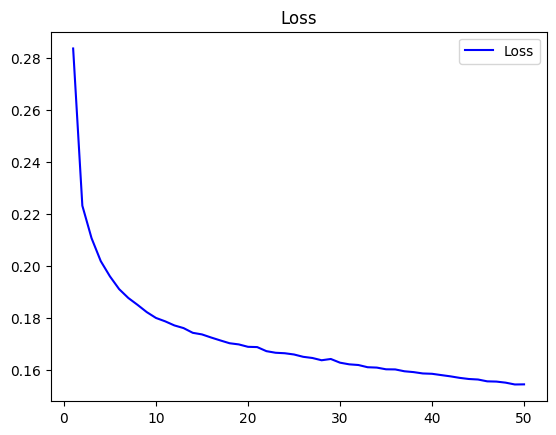

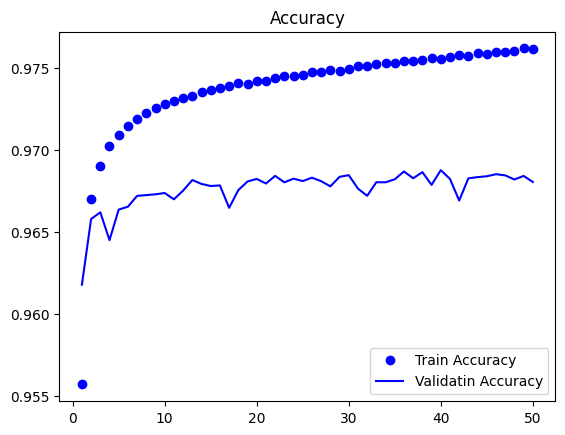

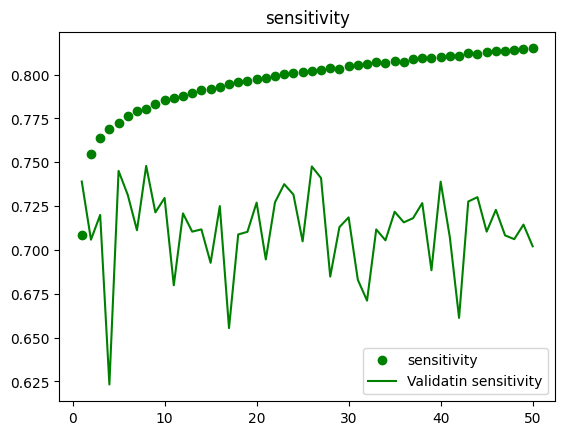

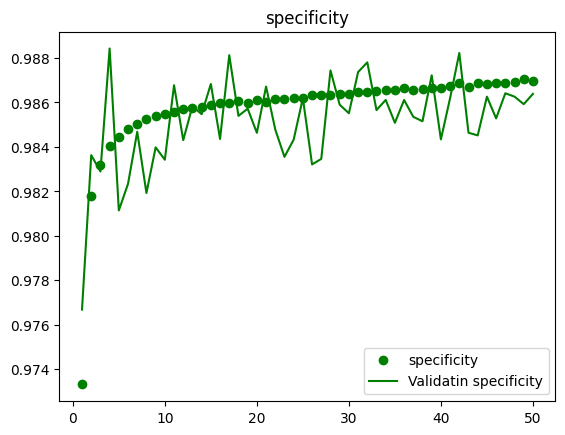

<Figure size 640x480 with 0 Axes>

In [4]:
check_result.plot_history(HISTORY_PATH)

In [ ]:
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'f1_score' : metrics.f1_score,
                  'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_1024_fG_wo_slice.tf'

test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)
test_generator = data_generator.FullSizedDataGenerator(
    TEST_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

loss, sen, spe, acc, f1, iou = metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

: 

In [4]:
import pickle
# Save the metrics as a dictionary
metrics_dict = {
    'loss': loss,
    'sen': sen,
    'spe': spe,
    'acc': acc,
    'f1': f1,
    'iou': iou
}

# Define the file path
file_path = 'dense_unet_50ep_1024_fG_wo_slice_metrics_data.pkl'

# Write the metrics to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(metrics_dict, f)

In [5]:
file_path = 'dense_unet_50ep_1024_fG_wo_slice_metrics_data.pkl'

# Load the metrics from the pickle file
with open(file_path, 'rb') as f:
    metrics_dict = pickle.load(f)

# Access the metrics from the loaded dictionary
loss = metrics_dict['loss']
sen = metrics_dict['sen']
spe = metrics_dict['spe']
acc = metrics_dict['acc']
f1 = metrics_dict['f1']
iou = metrics_dict['iou']

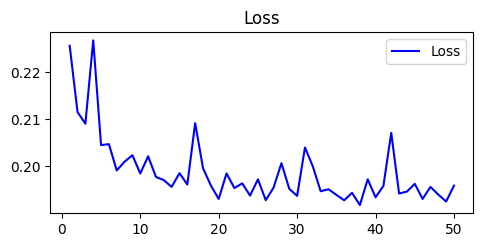

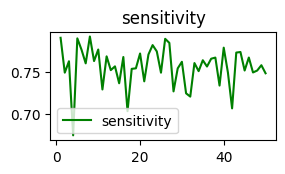

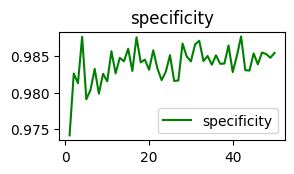

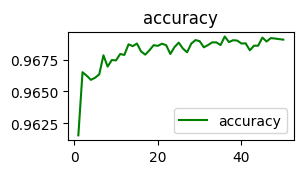

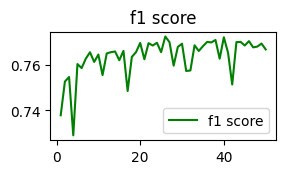

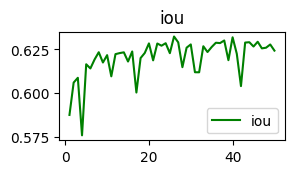

<Figure size 640x480 with 0 Axes>

In [6]:
metrics.plot_test_evaluation_result(loss, sen, spe, acc ,f1, iou)